In [1]:
# ! pip install missingno
# ! pip install -U imbalanced-learn
# ! pip install lightgbm
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import sklearn.metrics

import matplotlib.gridspec as gridspec
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,auc,precision_recall_curve,accuracy_score,recall_score,f1_score,confusion_matrix,classification_report


Read the file, and check the size of the dataset

In [2]:
data = pd.read_csv("creditcard.csv")
print("······Size of the dataset······")
print(data.shape)
print("\n")
print("······Header of the data set······")
print(data.head())
print("\n")

······Size of the dataset······
(284807, 31)


······Header of the data set······
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.0

Check the information of the dataset

In [3]:
print("······The type of data in the dataset·····")
print(data.info())
print("\n")

······The type of data in the dataset·····
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null floa

Check the distribution of the dataset

In [4]:
print(data.describe())
print("\n")

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

Using package missingno to visualize missing data

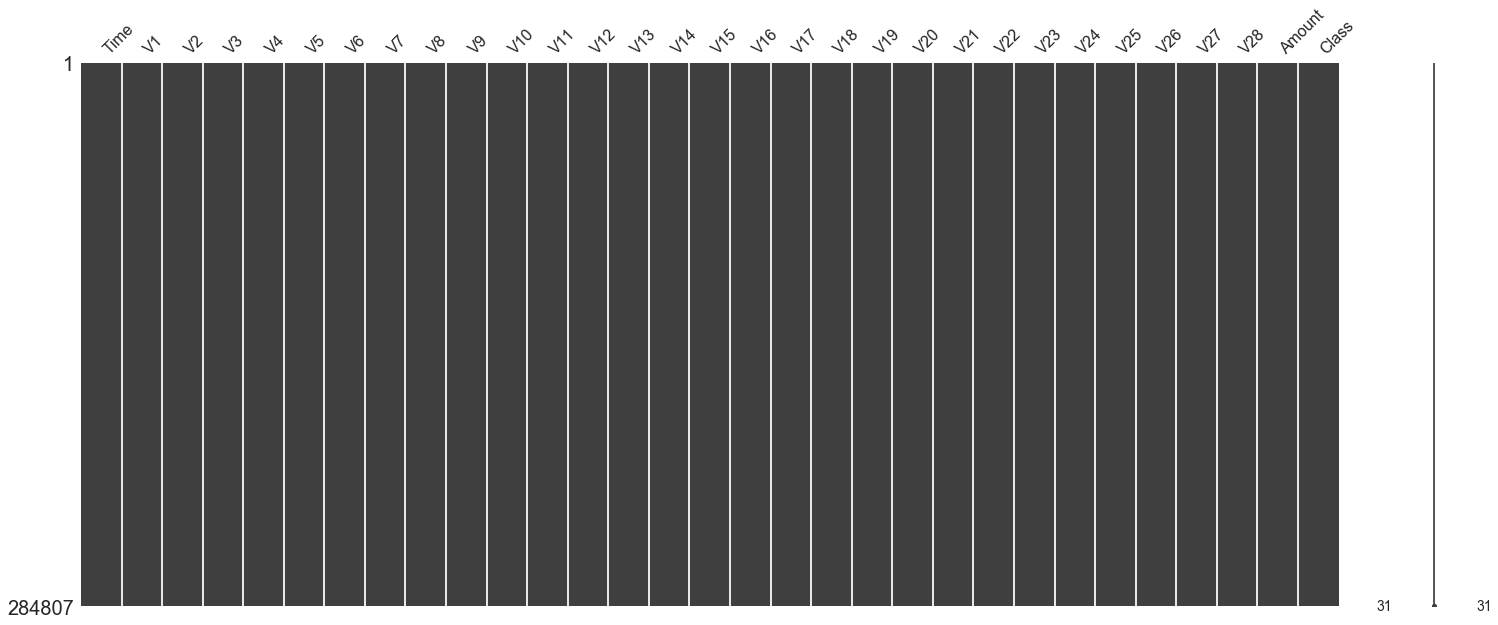

In [5]:
missingno.matrix(data)
plt.show()

Check the category label situation. As you can see, the data set is very unbalanced, and the fraud sample only accounts for a small percentage of the total sample.

In [6]:
print("······Check the category label situation······")
print(data.Class.value_counts())
print("\n")

······Check the category label situation······
0    284315
1       492
Name: Class, dtype: int64




In [7]:
data['Hour'] =data["Time"].apply(lambda x : divmod(x, 3600)[0]) #Change Time to Hour

#Differentiate positive and negative samples
Xfraud = data[data["Class"] == 1]
XnonFraud = data[data["Class"] == 0]

Visualize the correlation of fraud samples. The result shows that the correlation of some variables of fraud samples is strong.

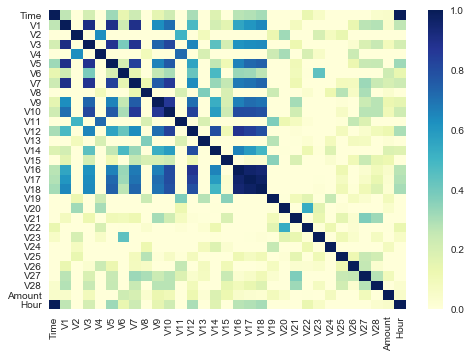

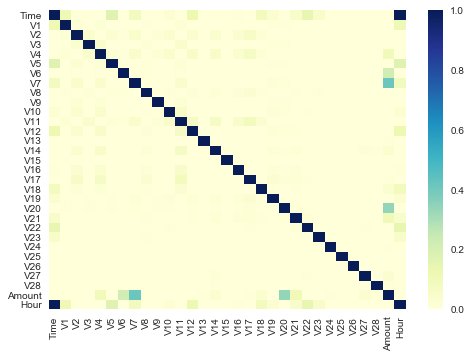

In [8]:
sns.heatmap(Xfraud.drop('Class',axis=1).corr(),vmax=1,vmin=0,cmap='YlGnBu')
plt.show()

sns.heatmap(XnonFraud.drop('Class',axis=1).corr(),vmax=1,vmin=0,cmap='YlGnBu')
plt.show()

## Analyze the transaction amount of positive and negative samples

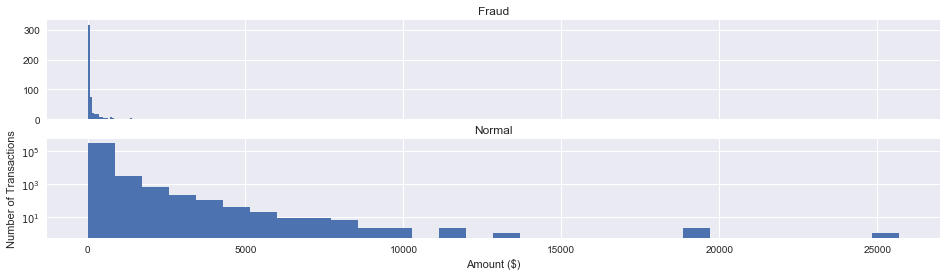

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))

bins = 30

ax1.hist(data[data["Class"]== 1]["Amount"], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data[data["Class"] == 0]["Amount"], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Analyze the transaction time of positive and negative samples

Time of fraud transaction

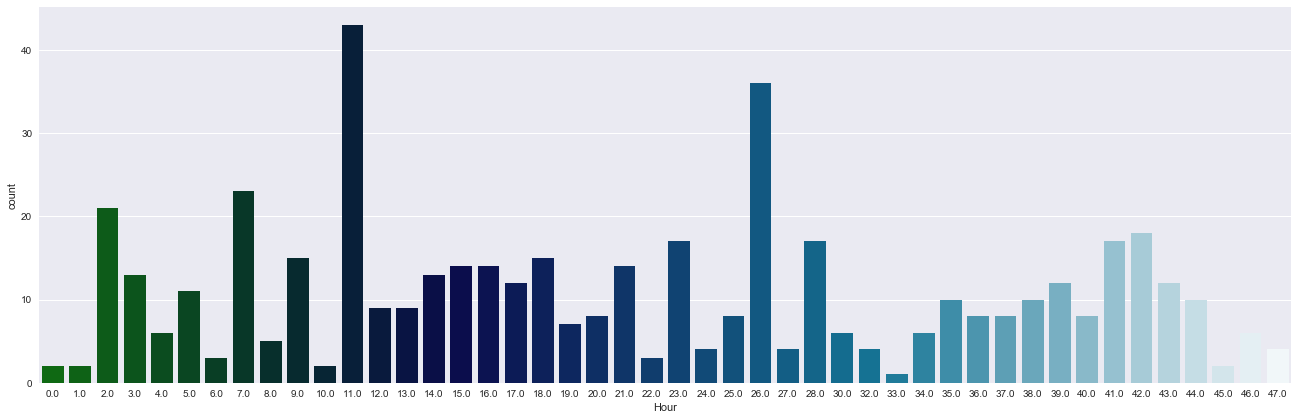

In [10]:
sns.factorplot(x="Hour", data=data[data["Class"]== 1], kind="count",  palette="ocean", size=6, aspect=3)
plt.show()

Time of normal transaction

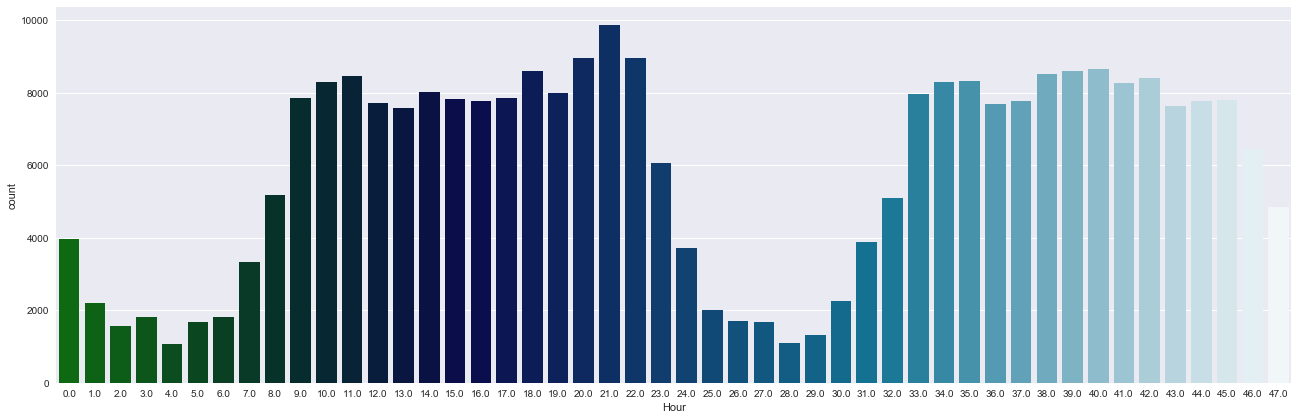

In [11]:
sns.factorplot(x="Hour", data=data[data["Class"]== 0], kind="count",  palette="ocean", size=6, aspect=3)
plt.show()

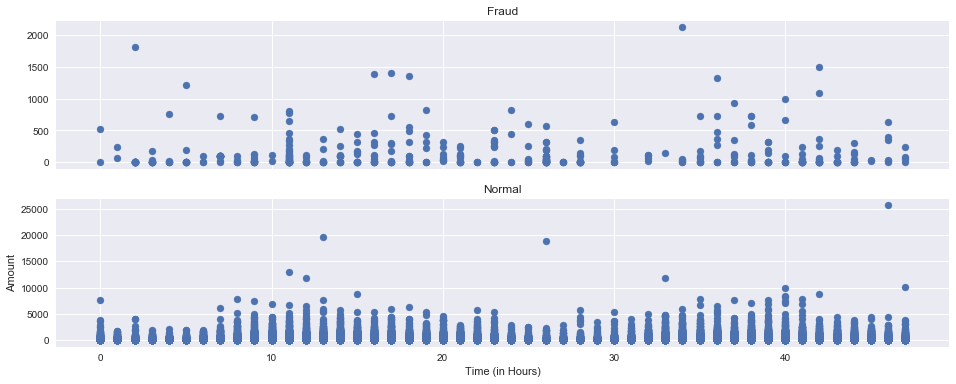

In [12]:
#The relationship between fraudulent transactions, transaction amount and transaction time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))

ax1.scatter(data[data["Class"] == 1]["Hour"], data[data["Class"] == 1]["Amount"])
ax1.set_title('Fraud')

ax2.scatter(data[data["Class"] == 0]["Hour"], data[data["Class"] == 0]["Amount"])
ax2.set_title('Normal')

plt.xlabel('Time (in Hours)')
plt.ylabel('Amount')
plt.show()

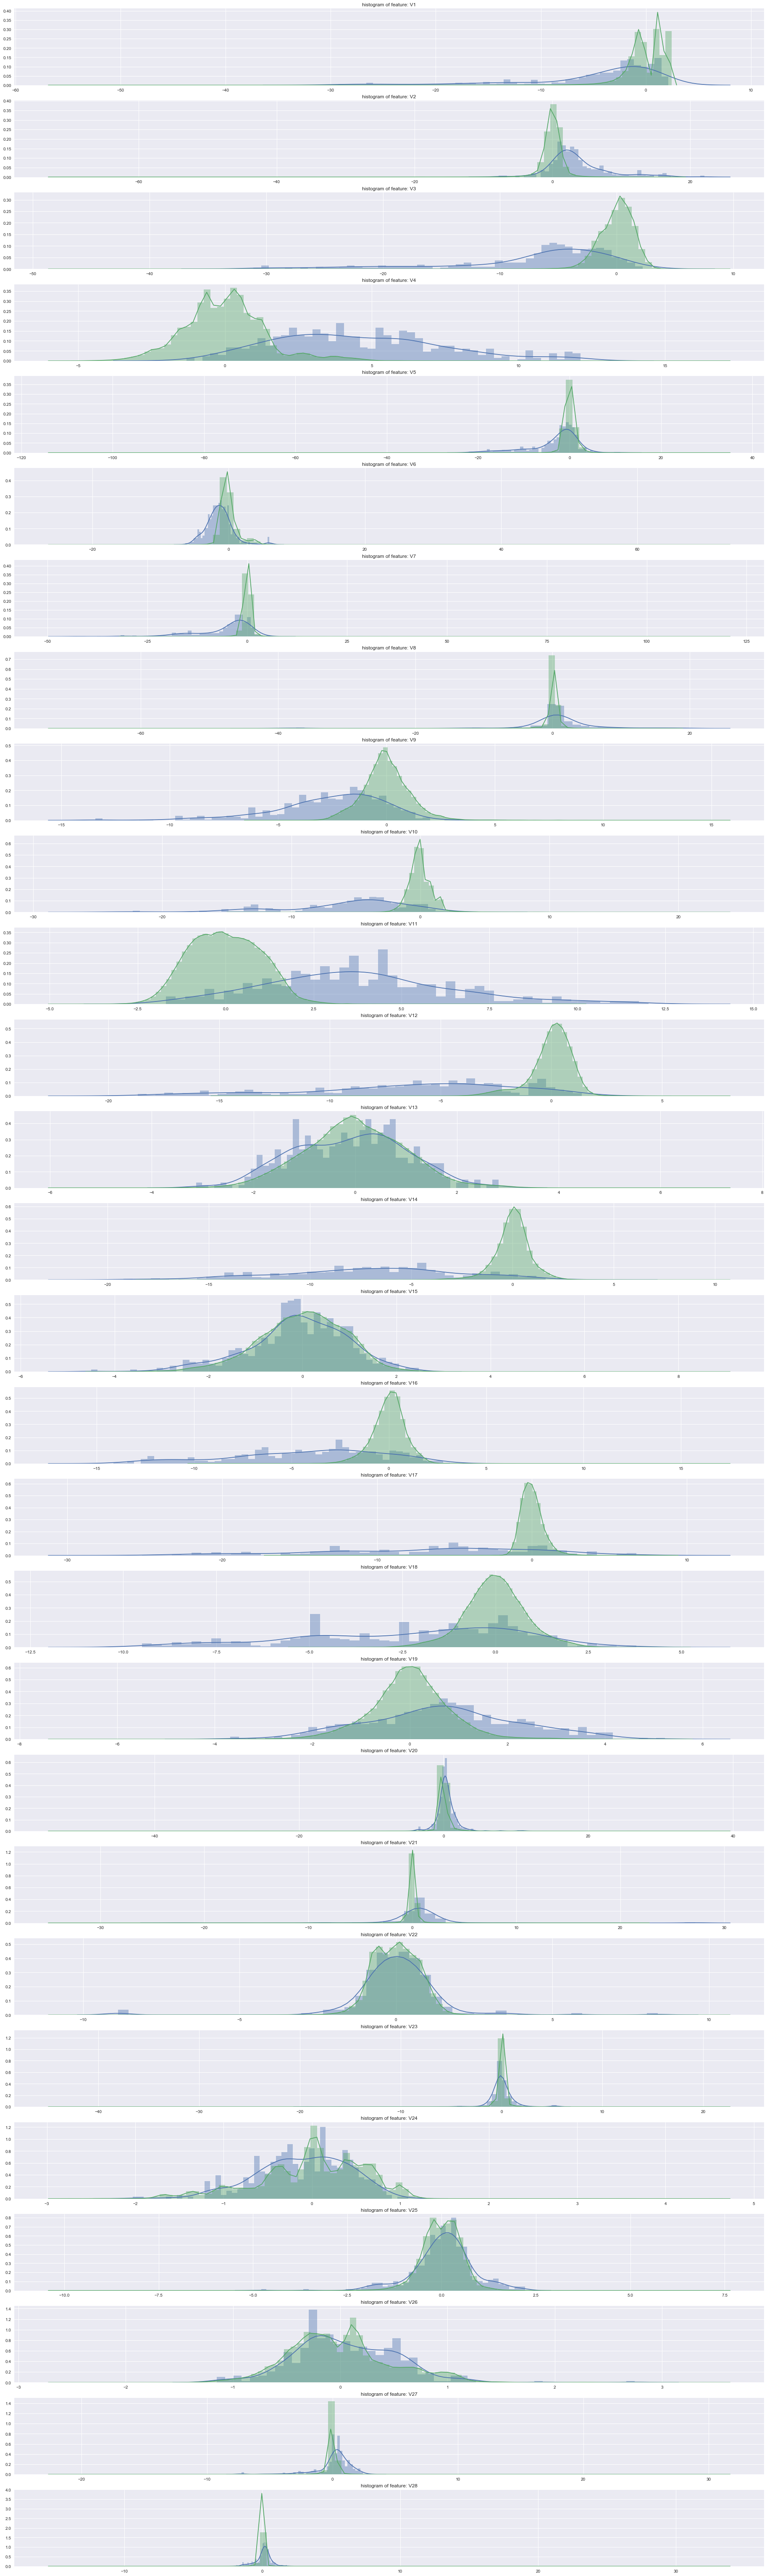

In [13]:
v_feat = data.columns[1:29]
plt.figure(figsize=(16*2,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[v_feat]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[data["Class"] == 1][cn], bins=50,label='Class_1')
    sns.distplot(data[data["Class"] == 0][cn], bins=100,label='Class_0')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))

plt.show()

#### Delete the variables with little differentiation between positive and negative samples. Of course, if the design model is complex and the sample size is large, these variables can be retained to avoid information loss.

In [14]:
droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time']
data_new = data.drop(droplist, axis = 1)
data_new.shape # Check the dimension of the dataset

(284807, 19)

In [15]:
# Standarize columns: ['Amount','Hour']
col = ['Amount','Hour']
sc =StandardScaler() 
data_new[col] =sc.fit_transform(data_new[col])
data_new.head()

# Divide features and labels
X_data = data_new.drop('Class',axis=1)
y = data_new.Class
# Get the index of positive and negative samples
index1 = data_new[data_new.Class==1].index
index0 = data_new[data_new.Class==0].index

### Perform PCA on the data and reduce the dimension to 2 dimensions.


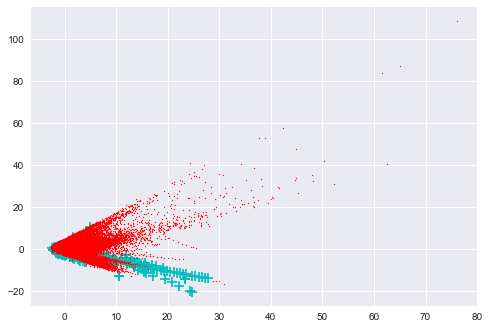

In [16]:
data_pca = PCA(n_components=2).fit_transform(X_data)

f = plt.figure(1)#Observe the data distribution
plt.scatter(data_pca[index1,0],data_pca[index1,1],marker = '+', color = 'c',s=100)
plt.scatter(data_pca[index0,0],data_pca[index0,1],marker = 'o', color = 'r',s=1)
plt.show()

#### Visualize again after sampling, we can see the data can not be divided linearly.

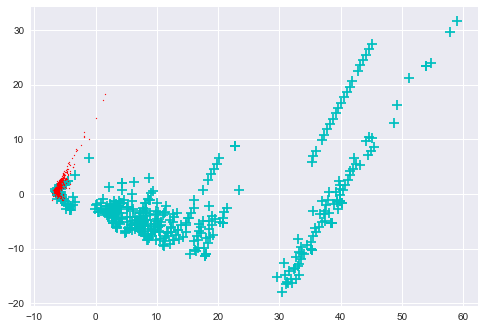

In [17]:
non_fraud = data_new[data_new['Class'] == 0].sample(1000)
fraud = data_new[data_new['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).values
index1 = df[df.Class==1].index
index0 = df[df.Class==0].index
data_pca = PCA(n_components=2).fit_transform(X)
f = plt.figure(1)#Observe the data distribution
plt.scatter(data_pca[index1,0],data_pca[index1,1],marker = '+', color = 'c',s=100)
plt.scatter(data_pca[index0,0],data_pca[index0,1],marker = 'o', color = 'r',s=1)
plt.show()

#### We try to use a nonlinear dimensionality reduction method: T-SNE dimensionality reduction. The data can be observed to have nonlinear characteristics. After the nonlinear dimension reduction in T-SNE, the positive and negative samples are clearly distinguished.

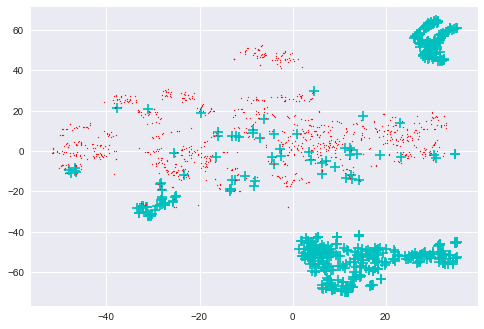

In [18]:
data_tsne = TSNE(n_components=2).fit_transform(X)
f = plt.figure(1)
plt.scatter(data_tsne[index1,0],data_tsne[index1,1],marker = '+', color = 'c',s=100)
plt.scatter(data_tsne[index0,0],data_tsne[index0,1],marker = 'o', color = 'r',s=1)
plt.show()

#### 3D visualization shows that positive and negative samples are clearly distinguished using T-SNE

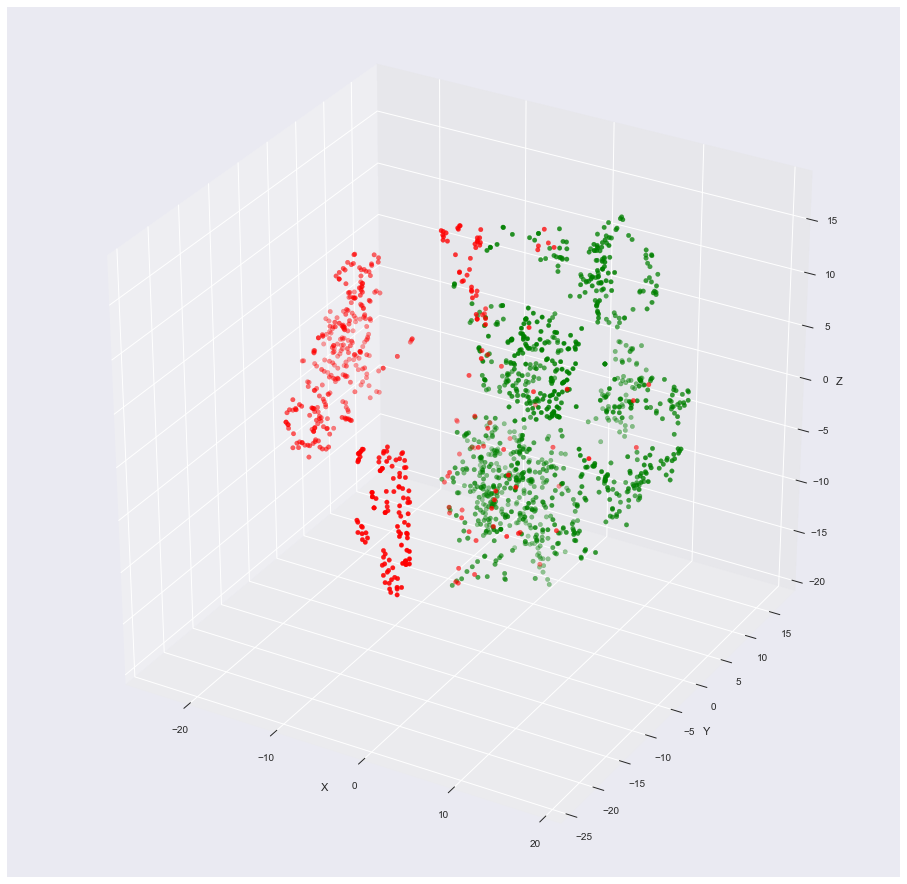

In [19]:
from mpl_toolkits.mplot3d import Axes3D
data_tsne = TSNE(n_components=3).fit_transform(X)
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tsne[index1,0],data_tsne[index1,1],data_tsne[index1,2], c='r')  
ax.scatter(data_tsne[index0,0],data_tsne[index0,1],data_tsne[index0,2], c='g')

ax.set_zlabel('Z') 
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

#### If the data is directly input into the LR model, it can be found that the model does not perform well in the positive example due to data imbalance.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size = 0.3, random_state = 2019)
print(X_train.shape,X_test.shape)

# Build parameter combination
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,],
                            'penalty': [ 'l1', 'l2']}
# Model：LogisticRegression；Parameter combination：param_grid ；10-fold cross validaton
grid_search = GridSearchCV(LogisticRegression(),  param_grid, cv=10) 

# Use the training set to fine-tune the best model
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
# {'C': 0.1, 'penalty': 'l2'}

best_model = grid_search.best_estimator_

print('accuracy_score:',accuracy_score(y_test,best_model.predict(X_test)))
print('roc_auc_score:',roc_auc_score(y_test,best_model.predict(X_test)))
print('recall_score:',recall_score(y_test,best_model.predict(X_test)))
print('precision_score:',precision_score(y_test,best_model.predict(X_test)))

print(classification_report(y_test, best_model.predict(X_test)))

(199364, 18) (85443, 18)
{'C': 1, 'penalty': 'l2'}
accuracy_score: 0.9991573329588147
roc_auc_score: 0.8038512204037437
recall_score: 0.6078431372549019
precision_score: 0.8857142857142857
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.89      0.61      0.72       153

    accuracy                           1.00     85443
   macro avg       0.94      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443



#### Using SMOTE to deal with the imbalanced data, it can be found that the model perform better in both positive and negative examples.

In [21]:
#Use SMOTE to deal with the imbalanced data
X_sample,y_sample = SMOTE(random_state=2019).fit_sample(X_data,y)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.3, random_state = 2019)

# Build parameter combination
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,],
                            'penalty': [ 'l1', 'l2']}
# Model：LogisticRegression；Parameter combination：param_grid ；10-fold cross validaton
grid_search = GridSearchCV(LogisticRegression(),  param_grid, cv=10)

# Use the training set to fine-tune the best model
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print('accuracy_score:',accuracy_score(y_test,best_model.predict(X_test)))
print('roc_auc_score:',roc_auc_score(y_test,best_model.predict(X_test)))
print('recall_score:',recall_score(y_test,best_model.predict(X_test)))
print('precision_score:',precision_score(y_test,best_model.predict(X_test)))

confusion_matrix(y_test, best_model.predict(X_test))  # Generate the confusion matrix

print(classification_report(y_test, best_model.predict(X_test)))

accuracy_score: 0.9384368276969793
roc_auc_score: 0.9385618431599277
recall_score: 0.90198163250999
precision_score: 0.9733577102509141
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     85003
           1       0.97      0.90      0.94     85586

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589



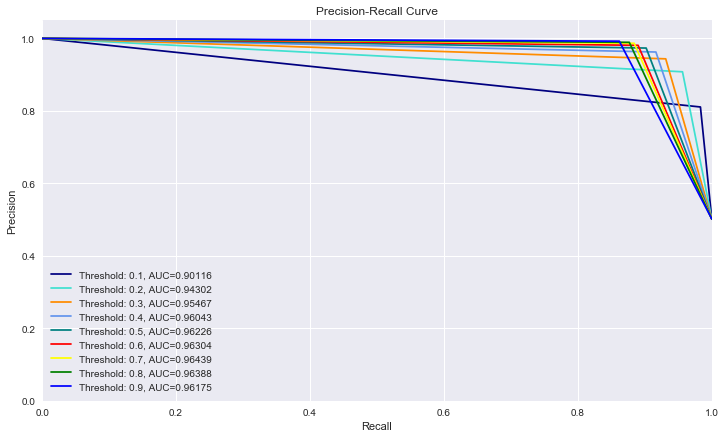

In [23]:
from itertools import cycle
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

#Use the best model to predict the label of the test set.
y_pred_proba = best_model.predict_proba(X_test)

# Set different thresholds
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  # Set different thresholds
plt.figure(figsize=(12,7))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_proba[:,1] > i 

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predictions_prob)
    area = auc(recall, precision)

    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s, AUC=%0.5f' %(i , area))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

plt.show()